In [33]:
import pandas as pd
import os
import glob
import re

USER = os.getlogin()
USER

'aolsen'

In [76]:
naics_to_abag = pd.read_excel(f'/Users/{USER}/Box/Modeling and Surveys/Regional Modeling/Regional Forecast PBA50/mappings/NAICS_to_ABAG_SECTORS.xlsx',engine='openpyxl',sheet_name='both')
naics_to_vs = naics_to_abag.set_index('NAICS-2').CES_VS
naics_to_abag6 = naics_to_abag.set_index('NAICS-2').MTCname.str.upper()
naics_to_abag11 = naics_to_abag.set_index('NAICS-2')['ABAG-11']


In [47]:
data={}
meta=[]

In [48]:
bayareafips_full = {'06001': 'Alameda', '06013': 'Contra Costa', '06041': 'Marin', '06055': 'Napa',
                    '06075': 'San Francisco', '06081': 'San Mateo', '06085': 'Santa Clara', '06097': 'Sonoma', '06095': 'Solano'}

In [49]:
ptrn = '({} County)'.format(' County|'.join(bayareafips_full.values()))
ptrn

'(Alameda County|Contra Costa County|Marin County|Napa County|San Francisco County|San Mateo County|Santa Clara County|Sonoma County|Solano County)'

In [38]:
# relate month x in quarter to calendar month

qtrmomap = {'month1_emplvl 1': 'January',
            'month2_emplvl 1': 'February',
            'month3_emplvl 1': 'March',
            'month1_emplvl 2': 'April',
            'month2_emplvl 2': 'May',
            'month3_emplvl 2': 'June',
            'month1_emplvl 3': 'July',
            'month2_emplvl 3': 'August',
            'month3_emplvl 3': 'September',
            'month1_emplvl 4': 'October',
            'month2_emplvl 4': 'November',
            'month3_emplvl 4': 'December'}

In [39]:
qtrmap = {1: 1, 2: 4, 3: 7, 4: 10}

In [40]:
# load files matching ptrn only

for k in glob.glob('/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/20**.q*/*'):
    if re.findall(ptrn, k):
        print(k)
        deets = re.search('(\d{4})\.q\d\-q\d\ (\d{5})', k.split('/')[-1])
        tmp = pd.read_csv(k)
        data[deets[1], deets[2]] = tmp

/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2000.q1-q4.by_area/2000.q1-q4 06001 Alameda County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2000.q1-q4.by_area/2000.q1-q4 06013 Contra Costa County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2000.q1-q4.by_area/2000.q1-q4 06041 Marin County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2000.q1-q4.by_area/2000.q1-q4 06055 Napa County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2000.q1-q4.by_area/2000.q1-q4 06075 San Francisco County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2000.q1-q4.by_area/2000.q1-q4 06081 San Mateo County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2000.q1-q4.by_area/2000.q1-q4 06085 Santa Clara County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/

/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2006.q1-q4.by_area/2006.q1-q4 06097 Sonoma County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2007.q1-q4.by_area/2007.q1-q4 06001 Alameda County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2007.q1-q4.by_area/2007.q1-q4 06013 Contra Costa County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2007.q1-q4.by_area/2007.q1-q4 06041 Marin County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2007.q1-q4.by_area/2007.q1-q4 06055 Napa County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2007.q1-q4.by_area/2007.q1-q4 06075 San Francisco County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2007.q1-q4.by_area/2007.q1-q4 06081 San Mateo County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/Q

/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2014.q1-q4.by_area/2014.q1-q4 06013 Contra Costa County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2014.q1-q4.by_area/2014.q1-q4 06041 Marin County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2014.q1-q4.by_area/2014.q1-q4 06055 Napa County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2014.q1-q4.by_area/2014.q1-q4 06075 San Francisco County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2014.q1-q4.by_area/2014.q1-q4 06081 San Mateo County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2014.q1-q4.by_area/2014.q1-q4 06085 Santa Clara County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2014.q1-q4.by_area/2014.q1-q4 06095 Solano County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/B

/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2020.q1-q3.by_area/2020.q1-q3 06085 Santa Clara County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2020.q1-q3.by_area/2020.q1-q3 06095 Solano County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2020.q1-q3.by_area/2020.q1-q3 06097 Sonoma County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2020.q1-q4.by_area/2020.q1-q4 06001 Alameda County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2020.q1-q4.by_area/2020.q1-q4 06013 Contra Costa County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2020.q1-q4.by_area/2020.q1-q4 06041 Marin County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2020.q1-q4.by_area/2020.q1-q4 06055 Napa County, California.csv
/Users/aolsen/Box/Vital Signs/1_Data/RESTRUCTURE/sources/BLS/QCEW/2

In [41]:
# combine yearly files

allyears_raw = pd.concat(data, names=['yr', 'fips', 'oid'])
allyears_raw['county'] = allyears_raw.area_title.str.replace(
    ', California', '')
allyears = allyears_raw.reset_index()
allyears['county'] = allyears.area_title.str.replace(', California', '')
allyears.head()

,yr,fips,oid,area_fips,own_code,industry_code,agglvl_code,size_code,year,qtr,...,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct,oty_month1_emplvl_pct_chg,oty_month2_emplvl_pct_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_pct_chg,county
0,2000,06001,0,6001,0,10,70,0,2000,1,...,108,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alameda County
1,2000,06001,1,6001,0,10,70,0,2000,2,...,84,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alameda County
2,2000,06001,2,6001,0,10,70,0,2000,3,...,71,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alameda County
3,2000,06001,3,6001,0,10,70,0,2000,4,...,51,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alameda County
4,2000,06001,4,6001,1,10,71,0,2000,1,...,111,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alameda County


# Summaries

## industries collapsed, county level
agglvl_code 70 is county level totals, no industry detail

In [ ]:
county_totals = allyears_raw[allyears_raw.agglvl_code == 70]

county_totals = county_totals.groupby(
    ['year', 'qtr', 'county']).sum().filter(regex='^month').reset_index()
county_totals.qtr = county_totals.qtr.astype(str)
county_totals = county_totals.set_index(['year', 'qtr', 'county']).stack(
).reset_index(name='value').rename(columns={'level_3': 'source'})

# concatenate varname with quarter, apply mapping
county_totals['qtr_mo'] = county_totals.source + ' ' + county_totals.qtr

# get month
county_totals['month'] = county_totals.qtr_mo.map(qtrmomap)

# format as date
county_totals['date'] = pd.to_datetime(county_totals.apply(
    lambda x: '{mo} {yr}'.format(mo=x.month, yr=x.year), axis=1), format='%B %Y')

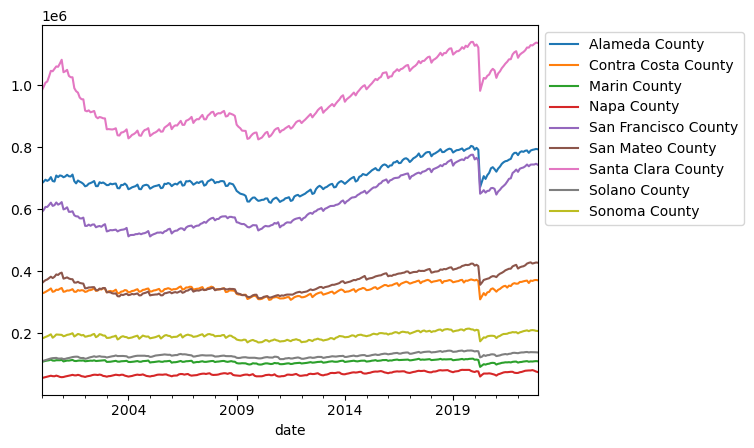

In [154]:
ax = county_totals.groupby(
    ['date', 'county']).value.sum().unstack('county').plot()
ax.legend(bbox_to_anchor=(1, 1))

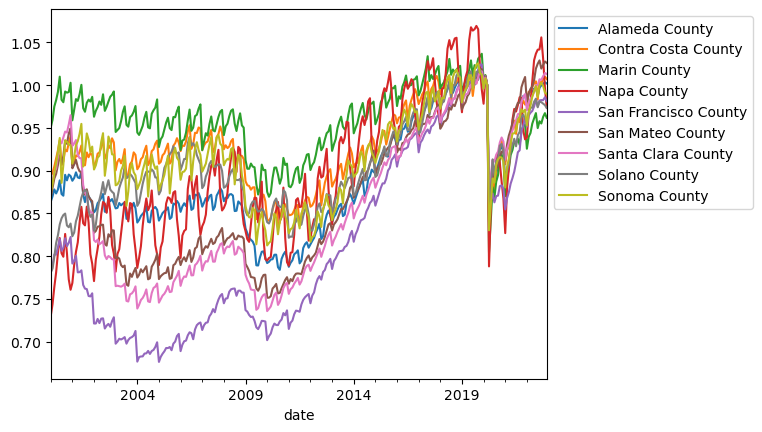

In [159]:
# indexed to March 2020
ax = (county_totals.groupby(
    ['date', 'county']).value.sum().unstack('county') / county_totals.groupby(
    ['date', 'county']).value.sum().unstack('county').loc['2020-03-01']).plot()
ax.legend(bbox_to_anchor=(1, 1))

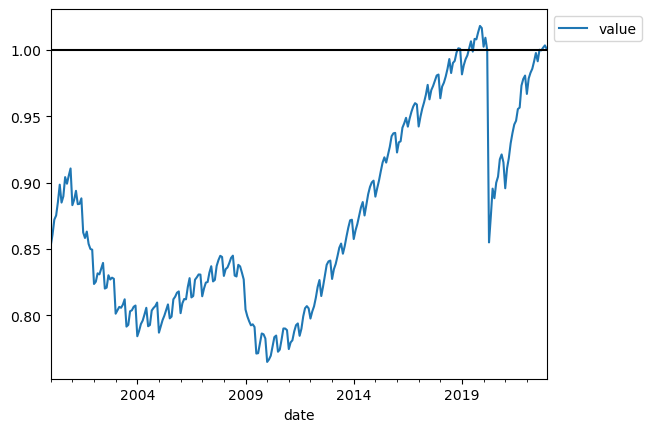

In [177]:
# indexed to March 2020
ax = (county_totals.groupby(
    ['date']).value.sum() / county_totals.groupby(
    ['date']).value.sum().loc['2020-03-01']).plot()

xmin, xmax = ax.get_xlim()

ax.legend(bbox_to_anchor=(1, 1))
ax.hlines(1, xmin, xmax, color='black')

## Super sector level (10 groups)
Industry detail is agglvl_code==73

BLS details [here](https://www.bls.gov/cew/classifications/aggregation/agg-level-titles.htm).

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_94642/3854366851.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  supersector_totals = supersector_totals.groupby(['year', 'qtr', 'county', 'industry_title']).sum().filter(regex='^month').reset_index()
/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_94642/3854366851.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  supersector_totals.industry_title = supersector_totals.industry_title.str.replace('\d{4} ', '').str.strip()


<AxesSubplot: xlabel='date'>

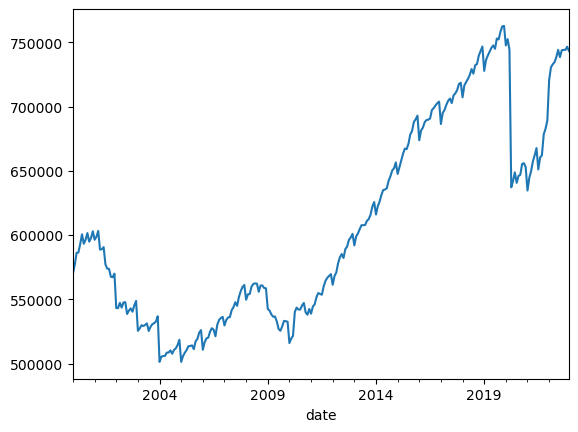

In [68]:
# Filter the data to include only supersector totals
supersector_totals = allyears_raw[allyears_raw.agglvl_code == 73]

# Group the data by year, quarter, county, and industry title and sum the monthly values
supersector_totals = supersector_totals.groupby(['year', 'qtr', 'county', 'industry_title']).sum().filter(regex='^month').reset_index()

# Remove the year from the industry title using regular expressions and strip extra whitespace
supersector_totals.industry_title = supersector_totals.industry_title.str.replace('\d{4} ', '').str.strip()

# Convert quarter to string type
supersector_totals.qtr = supersector_totals.qtr.astype(str)

# Set the index to year, quarter, county, and industry title, and stack the monthly values
supersector_totals = supersector_totals.set_index(['year', 'qtr', 'county', 'industry_title']).stack().reset_index(name='value').rename(columns={'level_4': 'source'})

# Combine the source and quarter columns to create a quarter-month column
supersector_totals['qtr_mo'] = supersector_totals.source + ' ' + supersector_totals.qtr

# Map the quarter-month values to month names using a predefined map (qtrmomap)
supersector_totals['month'] = supersector_totals.qtr_mo.map(qtrmomap)

# Create a datetime column by combining month and year values
supersector_totals['date'] = pd.to_datetime(supersector_totals.apply(lambda x: '{mo} {yr}'.format(mo=x.month, yr=x.year), axis=1), format='%B %Y')

# Drop unnecessary columns and reorder the columns
supersector_totals = supersector_totals.drop(['source', 'qtr_mo'], axis=1)[['date', 'year', 'qtr', 'county', 'industry_title', 'value']]

# Extract the month from the date column
supersector_totals['month'] = supersector_totals.date.dt.month

# Group the data by county and date, and plot the sum of values for San Francisco County
supersector_totals.groupby(['county', 'date']).value.sum().loc['San Francisco County'].plot()


## sector level (20 groups)
Industry detail is agglvl_code==74.

BLS details [here](https://www.bls.gov/cew/classifications/aggregation/agg-level-titles.htm).

In [81]:
# Filter the data to include only sumlev 74
county_indus_totals = allyears_raw[allyears_raw.agglvl_code == 74]

# Remove "NAICS" and numeric codes from the industry titles and strip extra whitespace
county_indus_totals.industry_title = county_indus_totals.industry_title.str.replace(
    'NAICS \d{2}(-\d{2})?', '').str.strip()

# Convert the two-digit industry codes to integers and create a new column (naics_2)
county_indus_totals['naics_2'] = county_indus_totals.industry_code.str.slice(
    0, 2).astype(int)

# Create a new column for the two-digit industry codes (industry_title_11) by slicing the industry_code column
county_indus_totals['abag_11'] = county_indus_totals.naics_2.map(
    naics_to_abag11)

# Create a new column for the two-digit industry codes (industry_title_11) by slicing the industry_code column
county_indus_totals['abag_6'] = county_indus_totals.naics_2.map(naics_to_abag6)


# Map the two-digit industry codes to their corresponding values (industry_title_vs)
county_indus_totals['industry_title_vs'] = county_indus_totals.naics_2.map(
    naics_to_vs)

# Group the data by year, quarter, county, and industry_title_vs, sum the monthly values, and stack the months
county_indus_totals = county_indus_totals.groupby(['year', 'qtr', 'county', 'abag_6']).sum().filter(
    regex='^month').stack().reset_index(name='value').rename(columns={'level_4': 'source'})

# Extract the month number from the source column and adjust it based on the quarter
county_indus_totals['mo'] = county_indus_totals.source.str.extract(
    '(\d)', expand=False).astype(int)
county_indus_totals['mo'] = county_indus_totals.qtr.map(
    qtrmap) + county_indus_totals.mo - 1

# Create a date column using the year and adjusted month values
county_indus_totals['date'] = pd.to_datetime(county_indus_totals.apply(
    lambda x: '01-{:02d}-{}'.format(x.mo, x.year), axis=1), format="%d-%m-%Y")

# Uncomment the following lines if you want to set the index, sort it, and unstack the industry_title_vs column
# county_indus_totals = county_indus_totals.set_index(['date', 'county', 'industry_title_vs']).value.sort_index().sum(level=['date', 'industry_title_vs']).unstack(1)

# Output the county_indus_totals DataFrame
county_indus_totals.groupby(['date', 'abag_6'
                             ]).value.sum().unstack('abag_6')

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_94642/2567020422.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  county_indus_totals.industry_title = county_indus_totals.industry_title.str.replace(
/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_94642/2567020422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_indus_totals.industry_title = county_indus_totals.industry_title.str.replace(
/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_94642/2567020422.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

abag_6,AGREMPN,FPSEMPN,HEREMPN,MWTEMPN,OTHEMPN,RETEMPN
date,,,,,,
2000-01-01,19841,838695,777134,700222,443706,348803
2000-02-01,21148,851713,790549,706280,447726,344114
2000-03-01,21967,863411,803766,713740,456872,345461
2000-04-01,23968,866246,800487,716006,463180,344961
2000-05-01,25352,874444,806923,721110,478765,348653
...,...,...,...,...,...,...
2022-08-01,16445,1006089,1380356,651817,618577,306996
2022-09-01,16926,998747,1395596,649595,613738,303532
2022-10-01,15279,1003975,1403798,647183,611602,305347


# QA/QC check for nondisclosure loss at the county level
That is, comparing summary level 74 at naics sector detail where we lose data due to non-disclosure - with summary level 70, where only job totals are reported at the county level and thus not subject to nondisclosure - will give us a sense of the employment loss due to nondisclosure.

In [88]:
totals_sumlev_74 = county_indus_totals.groupby(['date','county']).value.sum()

In [89]:
totals_sumlev_70 = county_totals.groupby(['date','county']).value.sum()

In [90]:
totals_sumlev_73 = supersector_totals.groupby(['date','county']).value.sum()

In [99]:
# combine them
disclosure_cost = pd.concat([totals_sumlev_70, totals_sumlev_73, totals_sumlev_74], keys=[
                            's70', 's73', 's74'], names=['sumlev'])
disclosure_cost

sumlev  date        county              
s70     2000-01-01  Alameda County           683734
                    Contra Costa County      329470
                    Marin County             108588
                    Napa County               56363
                    San Francisco County     591260
                                             ...   
s74     2022-12-01  San Francisco County     742965
                    San Mateo County         427662
                    Santa Clara County      1135831
                    Solano County            138461
                    Sonoma County            207675
Name: value, Length: 7452, dtype: int64

## index relative to s70

In [109]:
disclosure_cost_74 = (disclosure_cost.loc['s74']/disclosure_cost.loc['s70'])

In [110]:
disclosure_cost_73 = (disclosure_cost.loc['s73']/disclosure_cost.loc['s70'])

In [140]:
def plotter(county='San Francisco County'):
    
    ax = disclosure_cost_73.loc[:, county].plot(label='73', legend=True)
    disclosure_cost_74.loc[:, county].plot(label='74', legend=True, ax=ax)
    ax.set_title(f'Sumlevel 73, 74 relative to 70 (county totals)\n{county}')

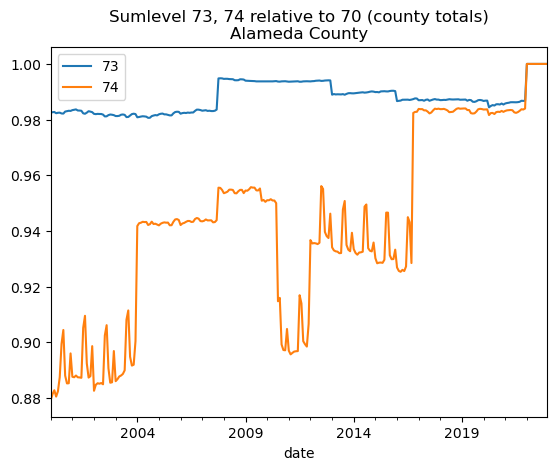

In [141]:
# as expected, sumlevel 74 has a larger information loss than sumlevel 73 which is more aggregate

plotter(county='Alameda County')

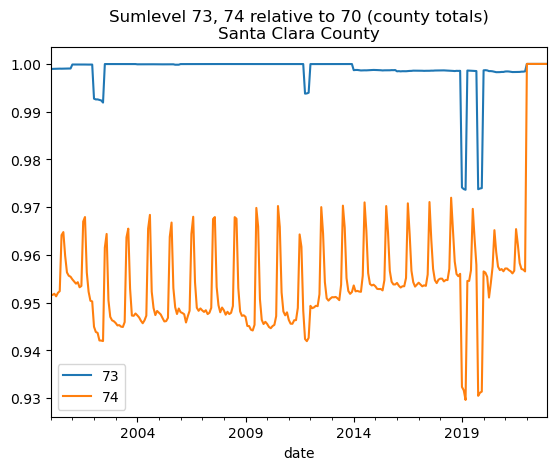

In [142]:
plotter(county='Santa Clara County')

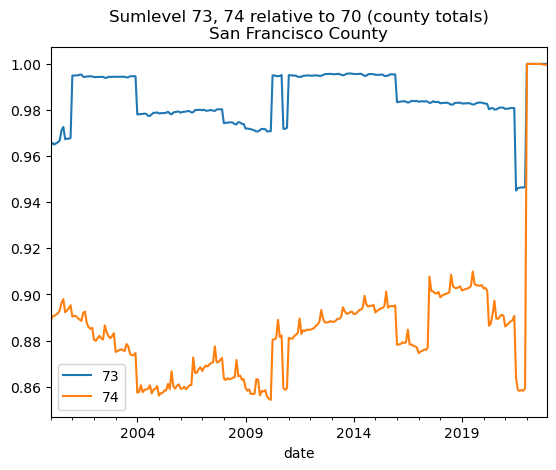

In [143]:
plotter(county='San Francisco County')